In [268]:
import pandas as pd #for handling csv and csv contents
from rdflib import Graph, Literal, RDF,RDFS, URIRef, Namespace #basic RDF handling
from rdflib.namespace import FOAF , XSD #most common namespaces
import urllib.parse #for parsing strings to URI's

import math
import numpy as np

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [269]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

In [270]:
uri = Namespace('http://exampleDb.org/')

# tbox

In [271]:
#classes
Paper = uri['Paper']

#subclasses of paper
poster = uri['poster']
shortPaper = uri['shortPaper']
fullPaper = uri['fullPaper']
demoPaper = uri['demoPaper']
#class 
Publication = uri['Publication']
review = uri['review']

#class
Person = uri['Person']

#subclasses of person
reviewer = uri['reviewer']
chair = uri['chair']
editor = uri['editor']
author = uri['author']

#class 
area = uri['area']

#subclasses of area
ml = uri['ml']
db = uri['db']
nlp = uri['nlp']

#class 
venue = uri['venue']

#subclasses of venue
journal = uri['journal']
conference = uri['conference']

##subclasses of conference
workshops = uri['workshops']
symposiums = uri['symposiums']
expertGrou = uri['expertGroups']
regularConferences = uri['regularConferences']

#properties 

#paper acceptedfor publication 
accepted = uri['acceptedfor']
#relatedArea
relatedto = uri['relatedto']
#paper submittedIn
submittedIn = uri['submittedIn']
#author wrote paper
wrote = uri['wrote']
#reviewer Submitted review
R_submitted = uri['submitted']
#review about paper
r_about = uri['reviewAbout']



###########
#venue name
vname = uri["venueName"]

# paper name
pname =  uri["paperName"]

# person name
person_name = uri["personName"]

# area name
a_name = uri["areaName"]

# publication name and year
pub_name = uri["publicationName"]
pub_year = uri["year"]

#review decision and comments
r_decision = uri["decision"]
r_comments = uri["comments"]

# chair handles 
chandles = uri["handledByC"]
# editor handles
ehandles = uri["handledByE"]

In [272]:
person_name

rdflib.term.URIRef('http://exampleDb.org/personName')

In [273]:
author

rdflib.term.URIRef('http://exampleDb.org/author')

In [274]:
g = Graph()

In [275]:
#class
g.add((Paper,RDF.type, RDFS.Class))
g.add((Publication,RDF.type, RDFS.Class))
g.add((review,RDF.type, RDFS.Class))
g.add((Person,RDF.type, RDFS.Class))
g.add((area,RDF.type, RDFS.Class))
g.add((venue,RDF.type, RDFS.Class))

#subclasses 
g.add((poster, RDFS.subClassOf, Paper))
g.add((shortPaper, RDFS.subClassOf, Paper))
g.add((fullPaper, RDFS.subClassOf, Paper))
g.add((demoPaper, RDFS.subClassOf, Paper))

g.add((reviewer, RDFS.subClassOf, Person))
g.add((chair, RDFS.subClassOf, Person))
g.add((editor, RDFS.subClassOf, Person))
g.add((author, RDFS.subClassOf, Person))

g.add((ml, RDFS.subClassOf, area))
g.add((db, RDFS.subClassOf, area))
g.add((nlp, RDFS.subClassOf, area))

g.add((conference, RDFS.subClassOf, venue))
g.add((journal, RDFS.subClassOf, venue))

g.add((workshops, RDFS.subClassOf, conference))
g.add((symposiums, RDFS.subClassOf, conference))
g.add((expertGrou, RDFS.subClassOf, conference))
g.add((regularConferences, RDFS.subClassOf, conference))

#properties
g.add((accepted,RDF.type, RDF.Property))
g.add((accepted,RDFS.domain,Paper))
g.add((accepted,RDFS.range,Publication))
g.add((Paper,accepted,Publication))

g.add((relatedto,RDF.type, RDF.Property))
g.add((relatedto,RDFS.domain,Paper))
g.add((relatedto,RDFS.range,area))
g.add((Paper,relatedto,area))

g.add((submittedIn,RDF.type, RDF.Property))
g.add((submittedIn,RDFS.domain,Paper))
g.add((submittedIn,RDFS.range,venue))
g.add((Paper,submittedIn,venue))

g.add((wrote,RDF.type, RDF.Property))
g.add((wrote,RDFS.domain,author))
g.add((wrote,RDFS.range,Paper))
g.add((author,wrote,Paper))

g.add((R_submitted,RDF.type, RDF.Property))
g.add((R_submitted,RDFS.domain,reviewer))
g.add((R_submitted,RDFS.range,review))
g.add((reviewer,R_submitted,review))


g.add((r_about,RDF.type, RDF.Property))
g.add((r_about,RDFS.domain,review))
g.add((r_about,RDFS.range,Paper))
g.add((review,r_about,Paper))

#venue name

g.add((vname,RDF.type, RDF.Property))
g.add((vname,RDFS.domain,venue))

# paper name

g.add((pname,RDF.type, RDF.Property))
g.add((pname,RDFS.domain,Paper))

# person name

g.add((person_name,RDF.type, RDF.Property))
g.add((person_name,RDFS.domain,Person))

# area name

g.add((a_name,RDF.type, RDF.Property))
g.add((a_name,RDFS.domain,area))

# publication name and year

g.add((pub_name,RDF.type, RDF.Property))
g.add((pub_name,RDFS.domain,Publication))
g.add((pub_year,RDF.type, RDF.Property))
g.add((pub_year,RDFS.domain,Publication))

#review decision and comments

g.add((r_decision,RDF.type, RDF.Property))
g.add((r_decision,RDFS.domain,review))
g.add((r_comments,RDF.type, RDF.Property))
g.add((r_comments,RDFS.domain,review))

# chair handles conference paper and editor handles journal 

g.add((chandles,RDF.type, RDF.Property))
g.add((chandles,RDFS.domain,conference))
g.add((chandles,RDFS.range,chair))


g.add((ehandles,RDF.type, RDF.Property))
g.add((ehandles,RDFS.domain,journal))
g.add((ehandles,RDFS.range,editor))

<Graph identifier=Nc561a7d4df214c8eaa68707e8cd6ca6c (<class 'rdflib.graph.Graph'>)>


(dot.exe:24900): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:24900): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



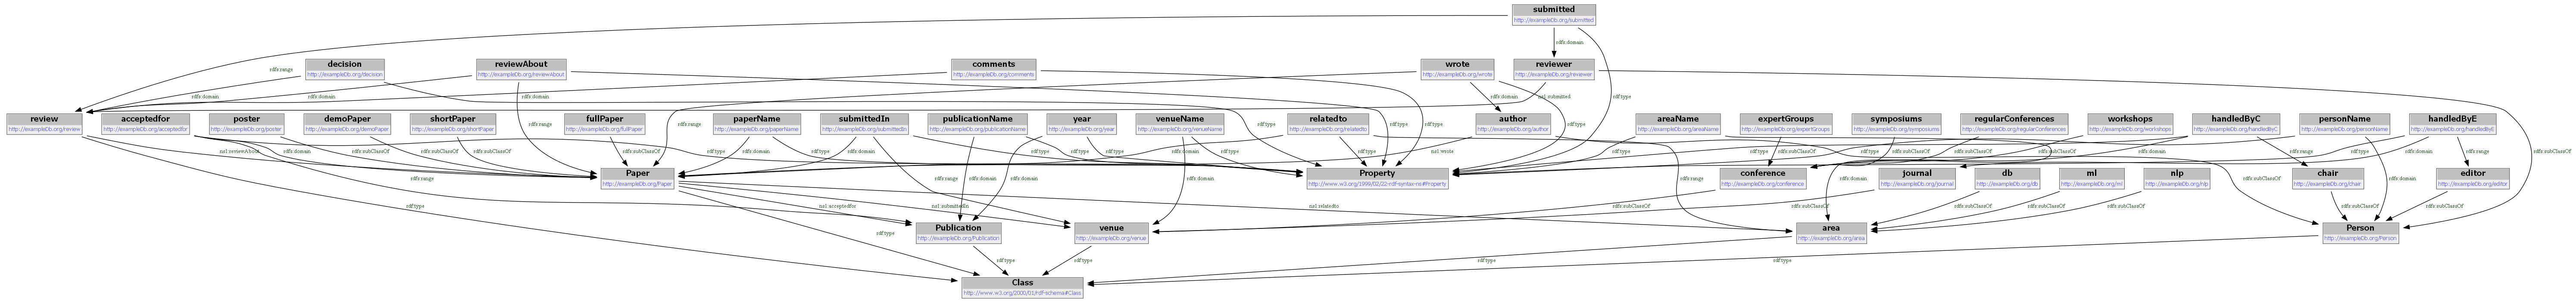

In [276]:
visualize(g)

In [284]:
# Save the results to disk
g.serialize('ptbox.ttl',format='turtle')

<Graph identifier=Nc561a7d4df214c8eaa68707e8cd6ca6c (<class 'rdflib.graph.Graph'>)>

In [290]:
#v = g1.serialize(format="xml")  g1.parse("name")

# Abox

## Person

In [243]:
url='kaggle_data_processed/authors.csv'
df=pd.read_csv(url,sep=",")
# df # uncomment to check for contents

In [244]:
 df.shape

(2172, 2)

In [260]:
sixty = math.ceil(df.shape[0]*.6)
eighty = math.ceil(df.shape[0]*.8)
nine = math.ceil(df.shape[0]*.9)
auth_sixty = df.iloc[:sixty,:]
review_twenty = df.iloc[sixty:eighty,:]
chair_ten = df.iloc[eighty:nine,:]
editor_ten = df.iloc[nine:,:]
# auth_sixty.to_csv("processed_data/authors.csv",index=False)
# review_twenty.to_csv("processed_data/reviewers.csv",index=False)
# chair_ten.to_csv("processed_data/chairs.csv",index=False)
# editor_ten.to_csv("processed_data/editors.csv",index=False)

In [261]:
# url='processed_data/'

# auth_sixty= pd.read_csv(url+"authors.csv",sep=",")
# review_twenty = pd.read_csv(url+"reviewers.csv",sep=",")
# chair_ten= pd.read_csv(url+"chairs.csv",sep=",")
# editor_ten= pd.read_csv(url+"editors.csv",sep=",")

In [151]:
for index, row in auth_sixty.iterrows():
    g.add((author+"/"+str(row['ID']),RDF.type,author) )
    g.add((author+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )
    
for index, row in review_twenty.iterrows():
    g.add((reviewer+"/"+str(row['ID']),RDF.type,reviewer) )
    g.add((reviewer+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )

for index, row in chair_ten.iterrows():
    g.add((chair+"/"+str(row['ID']),RDF.type,chair) )
    g.add((chair+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )

for index, row in editor_ten.iterrows():
    g.add((editor+"/"+str(row['ID']),RDF.type,editor) )
    g.add((editor+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )
    
#     #g.add((URIRef('http://example.org/people/Country'+row['Country'].replace(" ", "_")),RDF.type,Country) )
#     g.add((URIRef('http://example.org/people/Country'+row['Country'].replace(" ", "_")),FOAF.name, Literal(row['Country'], datatype=XSD.string)))
    
#     g.add((URIRef('http://example.org/people/Person'+row['Name']),lives_in,URIRef('http://example.org/people/Country'+row['Country'].replace(" ", "_")))) 
    
    

# Paper
## author wrote papers  
60%

In [346]:
written_articles = pd.read_csv('kaggle_data_processed/author_written_article.csv')
written_articles


,author_ID,article_ID
0,5.721820e+10,1
1,7.004904e+09,1
2,7.005513e+09,1
3,6.508306e+09,2
4,9.277159e+09,2
...,...,...
3936,7.401698e+09,880
3937,8.702836e+09,880
3938,7.005306e+09,880
3939,7.102555e+09,880


In [347]:
auth_art = pd.merge(auth_sixty, written_articles, how='left', left_on='ID', right_on='author_ID')
#auth_art = np.where((df['ID'] == written_articles['author_ID']), written_articles)

In [348]:
auth_art.drop(['author_ID'],axis= 1,inplace=True)

In [349]:
#auth_art.to_csv(url+"articles_written_by_author.csv",index =False)

In [351]:
#pd.read_csv(url+"articles_written_by_author.csv",sep=",")

,ID,name,article_ID
0,57218202833,Gautam A.,1
1,7004904337,Crandall J.W.,1
2,7004904337,Crandall J.W.,156
3,7004904337,Crandall J.W.,298
4,7004904337,Crandall J.W.,626
...,...,...,...
2874,56701050600,Reynolds P.R.,799
2875,57203184524,Cramer J.,444
2876,57201465968,Adams D.,444
2877,56248395300,Brown T.,444


In [340]:
#Name_articles = pd.read_csv('kaggle_data_processed/articles.csv')


In [341]:
Name_articles

,ID,title,volume,DOI
0,1,Self-assessment of Proficiency of Intelligent ...,1210 AISC,10.1007/978-3-030-51758-8_15
1,2,Bridging theory to practice: Feedforward and c...,695 LNEE,10.1007/978-3-030-58653-9_3
2,3,Development of sediment management guidelines ...,146,10.1061/(ASCE)HY.1943-7900.0001822
3,4,Structural design space exploration using prin...,20,10.1115/1.4047428
4,5,Religion-focused dating apps: A Q methodology ...,55,10.1016/j.tele.2020.101448
...,...,...,...,...
875,876,Formability of magnesium alloy AZ31B from room...,Part F8,10.1007/978-3-319-52392-7_91
876,877,A summary of data-aided equalizer experiments ...,NaN,NaN
877,878,Joining Dissimilar Material Using Friction Sti...,NaN,10.1007/978-3-319-52383-5_16
878,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468


In [342]:
# divide paper into subclasses type
tf = math.ceil(Name_articles.shape[0]*.25)
Name_articles['Papertype'] = ' '
Name_articles['Papertype'].iloc[:tf] = 'fullPaper'
Name_articles['Papertype'].iloc[tf:2*tf] = 'demoPaper'
Name_articles['Papertype'].iloc[2*tf:3*tf] = 'shortPaper'
Name_articles['Papertype'].iloc[3*tf:] = 'Poster'

<ipython-input-342-ff71c55e075e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Name_articles['Papertype'].iloc[:tf] = 'fullPaper'
<ipython-input-342-ff71c55e075e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Name_articles['Papertype'].iloc[tf:2*tf] = 'demoPaper'
<ipython-input-342-ff71c55e075e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Name_articles['Papertype'].iloc[2*tf:3*tf] = 'shortPaper'
<ipython-input-342-ff71c55e07

In [344]:
#Name_articles.to_csv("processed_data/articles.csv",index = False)

In [345]:
#pd.read_csv(url+"articles.csv",sep =",")

,ID,title,volume,DOI,Papertype
0,1,Self-assessment of Proficiency of Intelligent ...,1210 AISC,10.1007/978-3-030-51758-8_15,fullPaper
1,2,Bridging theory to practice: Feedforward and c...,695 LNEE,10.1007/978-3-030-58653-9_3,fullPaper
2,3,Development of sediment management guidelines ...,146,10.1061/(ASCE)HY.1943-7900.0001822,fullPaper
3,4,Structural design space exploration using prin...,20,10.1115/1.4047428,fullPaper
4,5,Religion-focused dating apps: A Q methodology ...,55,10.1016/j.tele.2020.101448,fullPaper
...,...,...,...,...,...
875,876,Formability of magnesium alloy AZ31B from room...,Part F8,10.1007/978-3-319-52392-7_91,Poster
876,877,A summary of data-aided equalizer experiments ...,NaN,NaN,Poster
877,878,Joining Dissimilar Material Using Friction Sti...,NaN,10.1007/978-3-319-52383-5_16,Poster
878,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,Poster


In [159]:
# articles types
for index, row in Name_articles[Name_articles['Papertype'] == 'fullPaper'].iterrows():
    g.add((fullPaper+"/"+str(row['ID']),RDF.type,fullPaper) )
    g.add((fullPaper+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )
  
    

for index, row in Name_articles[Name_articles['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['ID']),RDF.type,demoPaper) )
    g.add((demoPaper+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )


for index, row in Name_articles[Name_articles['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['ID']),RDF.type,shortPaper) )
    g.add((shortPaper+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )
    

for index, row in Name_articles[Name_articles['Papertype'] == 'Poster'].iterrows():
    g.add((poster+"/"+str(row['ID']),RDF.type,poster) )
    g.add((poster+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )
   
    

In [160]:
NArt = pd.merge(auth_art, Name_articles, how='left', left_on='article_ID', right_on='ID')

In [161]:
NArt.drop(['ID_y','volume','DOI'],axis=1,inplace =True)

In [162]:
NArt

,ID_x,name,article_ID,title,Papertype
0,57218202833,Gautam A.,1,Self-assessment of Proficiency of Intelligent ...,fullPaper
1,7004904337,Crandall J.W.,1,Self-assessment of Proficiency of Intelligent ...,fullPaper
2,7004904337,Crandall J.W.,156,Moderating operator influence in human-swarm s...,fullPaper
3,7004904337,Crandall J.W.,298,Cooperating in long-term relationships with ti...,demoPaper
4,7004904337,Crandall J.W.,626,Information design in crowdfunding under thres...,shortPaper
...,...,...,...,...,...
2874,56701050600,Reynolds P.R.,799,Re-epithelialization of whole porcine kidneys ...,Poster
2875,57203184524,Cramer J.,444,Effect of strain path on forming limits and re...,shortPaper
2876,57201465968,Adams D.,444,Effect of strain path on forming limits and re...,shortPaper
2877,56248395300,Brown T.,444,Effect of strain path on forming limits and re...,shortPaper


In [163]:
# author wrote article
# author wrote article
for index, row in NArt[NArt['Papertype'] == 'fullPaper'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))
    

for index, row in NArt[NArt['Papertype'] == 'demoPaper'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))


for index, row in NArt[NArt['Papertype'] == 'shortPaper'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))
    

for index, row in NArt[NArt['Papertype'] == 'Poster'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))
   
    

    

# published 

In [352]:
pubName = pd.read_csv('kaggle_data_processed/publications.csv')

In [353]:
pubName

,ID,name,Type
0,1,Advances in Intelligent Systems and Computing,Conference Paper
1,2,Lecture Notes in Electrical Engineering,Conference Paper
2,3,Journal of Hydraulic Engineering,Journal
3,4,Journal of Computing and Information Science i...,Journal
4,5,Telematics and Informatics,Conference Paper
...,...,...,...
399,400,CAD Computer Aided Design,Conference Paper
400,401,International Symposium on Advances in Computa...,Conference Paper
401,402,AIAA SPACE and Astronautics Forum and Expositi...,Conference Paper
402,403,IEEE Transactions on Control of Network Systems,Conference Paper


### published by

In [354]:
publishedIn = pd.read_csv('kaggle_data_processed/article_published_by.csv')


In [355]:
publishedIn

,article_ID,publisher_ID,year
0,1,433,2020
1,1,435,2019
2,1,780,2019
3,1,612,2020
4,2,378,2020
...,...,...,...
3534,879,141,2016
3535,879,475,2015
3536,880,492,2016
3537,880,300,2017


In [356]:
#### unique publisher and year

In [357]:
p = publishedIn[["publisher_ID","year"]].drop_duplicates()

In [358]:
p.shape

(2454, 2)

In [359]:
pN = pd.merge(p, pubName,  left_on='publisher_ID', right_on='ID')

In [360]:
pN

,publisher_ID,year,ID,name,Type
0,378,2020,378,ICCM International Conferences on Composite Ma...,Conference Paper
1,378,2017,378,ICCM International Conferences on Composite Ma...,Conference Paper
2,378,2018,378,ICCM International Conferences on Composite Ma...,Conference Paper
3,23,2019,23,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
4,23,2018,23,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
...,...,...,...,...,...
1100,311,2017,311,Proceedings of the 20th International Conferen...,Conference Paper
1101,108,2017,108,IEEE Security and Privacy,Conference Paper
1102,224,2016,224,"25th AIAA/CEAS Aeroacoustics Conference, 2019",Conference Paper
1103,355,2015,355,Journal of Mechanical Science and Technology,Journal


In [361]:
pN.drop(['publisher_ID'],axis=1,inplace = True)

In [366]:
#pN.to_csv(url +"publications_with_years.csv",index = False)

In [368]:
#pd.read_csv(url+"publications_with_years",sep=',')

,year,ID,name,Type
0,2020,378,ICCM International Conferences on Composite Ma...,Conference Paper
1,2017,378,ICCM International Conferences on Composite Ma...,Conference Paper
2,2018,378,ICCM International Conferences on Composite Ma...,Conference Paper
3,2019,23,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
4,2018,23,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
...,...,...,...,...
1100,2017,311,Proceedings of the 20th International Conferen...,Conference Paper
1101,2017,108,IEEE Security and Privacy,Conference Paper
1102,2016,224,"25th AIAA/CEAS Aeroacoustics Conference, 2019",Conference Paper
1103,2015,355,Journal of Mechanical Science and Technology,Journal


In [363]:
for index,row in pN.iterrows():
    g.add((Publication+"/"+str(row['ID']),RDF.type,Publication) )
    g.add((Publication+"/"+str(row['ID']),pub_name, Literal(row['name'], datatype=XSD.string)))
    g.add((Publication+"/"+str(row['ID']),pub_year, Literal(row['year'], datatype=XSD.decimal)))

In [176]:
published = pd.merge( publishedIn, pN, left_on=['publisher_ID','year'] ,right_on=['ID','year'])

In [177]:
published

,article_ID,publisher_ID,year,ID,name,Type
0,2,378,2020,378,ICCM International Conferences on Composite Ma...,Conference Paper
1,3,23,2019,23,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
2,233,23,2019,23,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
3,384,23,2019,23,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
4,3,382,2020,382,IEEE Geoscience and Remote Sensing Letters,Conference Paper
...,...,...,...,...,...,...
1622,877,342,2016,342,Proceedings - 2017 IEEE Cybersecurity Developm...,Conference Paper
1623,878,213,2015,213,SEFI 47th Annual Conference: Varietas Delectat...,Conference Paper
1624,879,341,2016,341,IEEE Sensors Journal,Journal
1625,879,274,2016,274,Research Technology Management,Conference Paper


In [178]:
Name_articles

,ID,title,volume,DOI,Papertype
0,1,Self-assessment of Proficiency of Intelligent ...,1210 AISC,10.1007/978-3-030-51758-8_15,fullPaper
1,2,Bridging theory to practice: Feedforward and c...,695 LNEE,10.1007/978-3-030-58653-9_3,fullPaper
2,3,Development of sediment management guidelines ...,146,10.1061/(ASCE)HY.1943-7900.0001822,fullPaper
3,4,Structural design space exploration using prin...,20,10.1115/1.4047428,fullPaper
4,5,Religion-focused dating apps: A Q methodology ...,55,10.1016/j.tele.2020.101448,fullPaper
...,...,...,...,...,...
875,876,Formability of magnesium alloy AZ31B from room...,Part F8,10.1007/978-3-319-52392-7_91,Poster
876,877,A summary of data-aided equalizer experiments ...,NaN,NaN,Poster
877,878,Joining Dissimilar Material Using Friction Sti...,NaN,10.1007/978-3-319-52383-5_16,Poster
878,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,Poster


In [179]:
NPub = pd.merge(Name_articles, published,  left_on='ID', right_on='article_ID')

In [180]:
NPub = NPub[NPub['publisher_ID']<=404]

In [181]:
NPub

,ID_x,title,volume,DOI,Papertype,article_ID,publisher_ID,year,ID_y,name,Type
0,2,Bridging theory to practice: Feedforward and c...,695 LNEE,10.1007/978-3-030-58653-9_3,fullPaper,2,378,2020,378,ICCM International Conferences on Composite Ma...,Conference Paper
1,3,Development of sediment management guidelines ...,146,10.1061/(ASCE)HY.1943-7900.0001822,fullPaper,3,23,2019,23,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
2,3,Development of sediment management guidelines ...,146,10.1061/(ASCE)HY.1943-7900.0001822,fullPaper,3,382,2020,382,IEEE Geoscience and Remote Sensing Letters,Conference Paper
3,4,Structural design space exploration using prin...,20,10.1115/1.4047428,fullPaper,4,105,2018,105,IEEE Transactions on Antennas and Propagation,Conference Paper
4,4,Structural design space exploration using prin...,20,10.1115/1.4047428,fullPaper,4,309,2018,309,"26th International Congress on Large Dams, 2018",Conference Paper
...,...,...,...,...,...,...,...,...,...,...,...
1622,878,Joining Dissimilar Material Using Friction Sti...,NaN,10.1007/978-3-319-52383-5_16,Poster,878,213,2015,213,SEFI 47th Annual Conference: Varietas Delectat...,Conference Paper
1623,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,Poster,879,341,2016,341,IEEE Sensors Journal,Journal
1624,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,Poster,879,274,2016,274,Research Technology Management,Conference Paper
1625,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,Poster,879,141,2016,141,Metallurgical and Materials Transactions A: Ph...,Conference Paper


In [182]:
NPub = NPub.drop_duplicates()

In [183]:
NPub.drop(['ID_y'],axis=1,inplace =True)

<ipython-input-183-ef037da6873d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NPub.drop(['ID_y'],axis=1,inplace =True)


In [184]:
# NPub['article_ID'].drop_duplicates(inplace=True)

## paper related to area

In [185]:
g.add((ml,a_name, Literal('Machine_learning', datatype=XSD.string)))
g.add((db,a_name, Literal('Databases', datatype=XSD.string)))
g.add((nlp,a_name, Literal('Natural_language_Processing', datatype=XSD.string)))


<Graph identifier=Ne265f8bb75744ffba96b867b93856bae (<class 'rdflib.graph.Graph'>)>

In [186]:
area_list =[ml,db,nlp]


## articles related area

In [187]:
for index, row in NPub[NPub['Papertype'] == 'fullPaper'].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))) )
    
    
for index, row in NPub[NPub['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))))
   
for index, row in NPub[NPub['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))))

for index, row in NPub[NPub['Papertype'] == 'Poster'].iterrows():
    g.add((poster+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))))

### paper accepted in publication

In [188]:
for index, row in NPub[NPub['Papertype'] == 'fullPaper'].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))    
    
    
for index, row in NPub[NPub['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))  
   

for index, row in NPub[NPub['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))  
   
for index, row in NPub[NPub['Papertype'] == 'Poster'].iterrows():
    g.add((poster+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))  

## conference

In [369]:
conf = pd.read_csv('kaggle_data_processed/conference.csv')


In [370]:
conf

,ID,name,Type
0,1,Advances in Intelligent Systems and Computing,Conference Paper
1,2,Lecture Notes in Electrical Engineering,Conference Paper
2,5,Telematics and Informatics,Conference Paper
3,6,Electric Power Systems Research,Conference Paper
4,7,Optical Fiber Technology,Conference Paper
...,...,...,...
299,400,CAD Computer Aided Design,Conference Paper
300,401,International Symposium on Advances in Computa...,Conference Paper
301,402,AIAA SPACE and Astronautics Forum and Expositi...,Conference Paper
302,403,IEEE Transactions on Control of Network Systems,Conference Paper


In [371]:
#Conf = NPub[NPub['Type'] == 'Conference Paper']# divide paper into subclasses type
tf = math.ceil(conf.shape[0]*.25)
conf['Conferencetype'] = ''
conf['Conferencetype'].iloc[:tf] = 'workshops'
conf['Conferencetype'].iloc[tf:2*tf] = 'symposiums'
conf['Conferencetype'].iloc[2*tf:3*tf] = 'expertGroups'
conf['Conferencetype'].iloc[3*tf:] = 'regularConferences'

<ipython-input-371-14efe2fe02d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf['Conferencetype'].iloc[:tf] = 'workshops'
<ipython-input-371-14efe2fe02d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf['Conferencetype'].iloc[tf:2*tf] = 'symposiums'
<ipython-input-371-14efe2fe02d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf['Conferencetype'].iloc[2*tf:3*tf] = 'expertGroups'
<ipython-input-371-14efe2fe02d1>:7: Se

In [372]:
conf["chairID"] = np.random.choice(chair_ten['ID'], size=len(conf))

In [373]:
conf.to_csv(url+"conference_withChair_sub.csv",index = False)

In [375]:
pd.read_csv(url+"conference_withChair_sub.csv",sep=',')

,ID,name,Type,Conferencetype,chairID
0,1,Advances in Intelligent Systems and Computing,Conference Paper,workshops,6506311950
1,2,Lecture Notes in Electrical Engineering,Conference Paper,workshops,57194162490
2,5,Telematics and Informatics,Conference Paper,workshops,7006631262
3,6,Electric Power Systems Research,Conference Paper,workshops,7406552522
4,7,Optical Fiber Technology,Conference Paper,workshops,57192893058
...,...,...,...,...,...
299,400,CAD Computer Aided Design,Conference Paper,regularConferences,6701695863
300,401,International Symposium on Advances in Computa...,Conference Paper,regularConferences,54399816500
301,402,AIAA SPACE and Astronautics Forum and Expositi...,Conference Paper,regularConferences,57197800472
302,403,IEEE Transactions on Control of Network Systems,Conference Paper,regularConferences,7005371369


In [193]:

for index, row in conf[conf['Conferencetype'] == 'workshops'].iterrows():
    g.add((workshops+"/"+str(row['ID']),RDF.type,workshops) )
    g.add((workshops+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((workshops+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))
     
    
    
for index, row in conf[conf['Conferencetype'] == 'symposiums'].iterrows():
    g.add((symposiums+"/"+str(row['ID']),RDF.type,symposiums) )
    g.add((symposiums+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((symposiums+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))

for index, row in conf[conf['Conferencetype'] == 'expertGroups'].iterrows():
    g.add((expertGrou+"/"+str(row['ID']),RDF.type,expertGrou) )
    g.add((expertGrou+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((expertGrou+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))

for index, row in conf[conf['Conferencetype'] == 'regularConferences'].iterrows():
    g.add((regularConferences+"/"+str(row['ID']),RDF.type,regularConferences) )
    g.add((regularConferences+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((regularConferences+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))

### paper submitted in conference

In [194]:
All = pd.merge(NPub[NPub['Type']=='Conference Paper'],conf , left_on='publisher_ID', right_on='ID')

In [195]:
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID']))) 
    

    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID'])))
    
    
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID']))) 
    


for index, row in All.loc[(All['Papertype'] == 'Poster') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'Poster') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'Poster') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'Poster') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID']))) 

   


## journals

In [376]:
jour = pd.read_csv('kaggle_data_processed/journal.csv')


In [377]:
jour.shape

(100, 3)

In [378]:
journal

rdflib.term.URIRef('http://exampleDb.org/journal')

In [379]:
editor_ten.reset_index(inplace=True)
editor_ten.drop(['index'],axis = 1, inplace =True)

In [380]:
editor_ten

,ID,name
0,7202812767,Griffiths A.
1,6603907334,Carrion R.
2,7103123753,Mathies R.A.
3,55945072200,Prince D.
4,55944583700,Shen C.
...,...,...
212,7401698226,Allen B.L.
213,8702836000,Anapalli S.
214,7005306331,Blackshaw R.E.
215,7102554886,Lyon D.J.


In [381]:
jour['editorID'] = editor_ten['ID'][:100]

In [383]:
# jour.to_csv(url+"journal_withEditor.csv",index = False)

In [385]:
# pd.read_csv(url+"journal_withEditor.csv",sep=',')

,ID,name,Type,editorID
0,3,Journal of Hydraulic Engineering,Journal,7202812767
1,4,Journal of Computing and Information Science i...,Journal,6603907334
2,9,International Journal of Electrical Power and ...,Journal,7103123753
3,11,Journal of Cleaner Production,Journal,55945072200
4,12,Journal of Manufacturing Processes,Journal,55944583700
...,...,...,...,...
95,369,International Journal of Multiphase Flow,Journal,55945088000
96,370,International Journal of Precision Engineering...,Journal,57202648414
97,375,Journal of Nonlinear Science,Journal,57188753800
98,384,Journal of Tissue Engineering,Journal,57202642302


In [203]:
for index, row in jour.iterrows():
    g.add((journal+"/"+str(row['ID']),RDF.type,journal))
    g.add((journal+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)))
    g.add((journal+"/"+str(row['ID']),ehandles, editor+"/"+str(row['editorID'])))

### submitted In journals

In [204]:
All_j = pd.merge(NPub[NPub['Type']=='Journal'],jour , how='left', left_on='publisher_ID', right_on='ID')

In [205]:
for index, row in All_j[All_j['Papertype'] == 'fullPaper'].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))    
    
    
for index, row in All_j[All_j['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))  
   

for index, row in All_j[All_j['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))  
   
for index, row in All_j[All_j['Papertype'] == 'Poster'].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))  

### reviews

In [386]:
reviews_df = pd.DataFrame(index=range(len(NPub)*2),columns=['Reviewer_ID','paper_id','decision','comments'])

In [387]:
NPub

,ID_x,title,volume,DOI,Papertype,article_ID,publisher_ID,year,name,Type
0,2,Bridging theory to practice: Feedforward and c...,695 LNEE,10.1007/978-3-030-58653-9_3,fullPaper,2,378,2020,ICCM International Conferences on Composite Ma...,Conference Paper
1,3,Development of sediment management guidelines ...,146,10.1061/(ASCE)HY.1943-7900.0001822,fullPaper,3,23,2019,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
2,3,Development of sediment management guidelines ...,146,10.1061/(ASCE)HY.1943-7900.0001822,fullPaper,3,382,2020,IEEE Geoscience and Remote Sensing Letters,Conference Paper
3,4,Structural design space exploration using prin...,20,10.1115/1.4047428,fullPaper,4,105,2018,IEEE Transactions on Antennas and Propagation,Conference Paper
4,4,Structural design space exploration using prin...,20,10.1115/1.4047428,fullPaper,4,309,2018,"26th International Congress on Large Dams, 2018",Conference Paper
...,...,...,...,...,...,...,...,...,...,...
1619,878,Joining Dissimilar Material Using Friction Sti...,NaN,10.1007/978-3-319-52383-5_16,Poster,878,213,2015,SEFI 47th Annual Conference: Varietas Delectat...,Conference Paper
1620,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,Poster,879,341,2016,IEEE Sensors Journal,Journal
1621,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,Poster,879,274,2016,Research Technology Management,Conference Paper
1622,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,Poster,879,141,2016,Metallurgical and Materials Transactions A: Ph...,Conference Paper


In [388]:
NPub.reset_index(inplace=True)
NPub.drop(['index'],axis = 1, inplace =True)

<ipython-input-388-4d7775506e77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NPub.drop(['index'],axis = 1, inplace =True)


In [389]:
NPub['article_ID'].head(30)

0      2
1      3
2      3
3      4
4      4
5      4
6      6
7      6
8      7
9      8
10     9
11    10
12    10
13    10
14    11
15    11
16    11
17    12
18    12
19    12
20    13
21    13
22    13
23    14
24    14
25    16
26    17
27    18
28    18
29    18
Name: article_ID, dtype: int64

### every paper has atleast 2 reviews

In [390]:
j=0
for i in range(len(NPub)):
    reviews_df['paper_id'].iloc[j]= NPub['article_ID'][i]
    j= j+1
    reviews_df['paper_id'].iloc[j]= NPub['article_ID'][i]
    j= j+1
  
 


In [391]:
reviews_df

,Reviewer_ID,paper_id,decision,comments
0,NaN,2,NaN,NaN
1,NaN,2,NaN,NaN
2,NaN,3,NaN,NaN
3,NaN,3,NaN,NaN
4,NaN,3,NaN,NaN
...,...,...,...,...
3243,NaN,879,NaN,NaN
3244,NaN,879,NaN,NaN
3245,NaN,879,NaN,NaN
3246,NaN,880,NaN,NaN


In [392]:
#comment = ['good','ok','perfecto']


reviews_df['Reviewer_ID']=np.random.choice(review_twenty['ID'], size=len(reviews_df))
reviews_df['decision'] = "accepted"
reviews_df['comments'] = "This is an interesting study and the authors have collected a unique dataset using cuttingedge methodology. The paper is generally well written and structured"

In [393]:
reviews_df['paper_id'].value_counts()

241    12
259    12
805    12
345    12
231    12
       ..
448     2
447     2
440     2
438     2
880     2
Name: paper_id, Length: 738, dtype: int64

In [398]:
reviews_df.to_csv(url+"reviews.csv",index = False)

In [400]:
pd.read_csv(url +"reviews.csv",sep=',')

,Reviewer_ID,paper_id,decision,comments
0,26039464700,2,accepted,This is an interesting study and the authors h...
1,56300864300,2,accepted,This is an interesting study and the authors h...
2,47461179000,3,accepted,This is an interesting study and the authors h...
3,57201111988,3,accepted,This is an interesting study and the authors h...
4,57207685496,3,accepted,This is an interesting study and the authors h...
...,...,...,...,...
3243,7402364894,879,accepted,This is an interesting study and the authors h...
3244,57202627167,879,accepted,This is an interesting study and the authors h...
3245,55502104200,879,accepted,This is an interesting study and the authors h...
3246,14621428300,880,accepted,This is an interesting study and the authors h...


In [395]:
for index, row in reviews_df.iterrows():
    g.add((review+"/"+str(index),RDF.type,review))
    g.add((reviewer+"/"+str(row['Reviewer_ID']),R_submitted,review+"/"+str(index)))  
    g.add((review+"/"+str(index),r_decision,Literal(row['decision'], datatype=XSD.string)))
    g.add((review+"/"+str(index),r_comments,Literal(row['comments'], datatype=XSD.string)))
    g.add((review+"/"+str(index),r_about,Paper+"/"+str(row['paper_id'])))
    
    
    

In [216]:
# Save the results to disk
g.serialize('pabox.ttl',format='turtle')

<Graph identifier=Ne265f8bb75744ffba96b867b93856bae (<class 'rdflib.graph.Graph'>)>

In [482]:
## how to store integer like year of paper and decision integer